In [6]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
from matplotlib.pyplot import plot as plt

In [7]:
sample_rate, signal = scipy.io.wavfile.read('aadir3.wav')  # File assumed to be in the same directory
signal  # Keep the first 3.5 seconds

array([ 7172, -5006,   498, ...,  -369,  -330,  -251], dtype=int16)

In [3]:
plt.plot(signal)

AttributeError: 'function' object has no attribute 'plot'

In [8]:
import pylab as plt

In [ ]:
plt.plot(signal)

In [ ]:
plt.show()

In [ ]:
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [ ]:
emphasized_signal = numpy.append(signal[0], signal[1:] - 0.97 * signal[:-1])

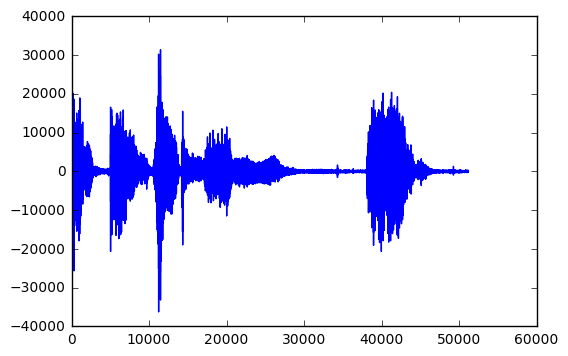

In [9]:
emphasized_signal = numpy.append(signal[0], signal[1:] - 0.97 * signal[:-1])
plt.plot(emphasized_signal)
plt.show()

In [ ]:
signal[0]

In [ ]:
signal[:-1]

In [ ]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [ ]:
t= np.linespace(0,)

In [ ]:
signal

In [ ]:
import numpy as np
np.size(signal)

In [ ]:
t = np.linspace(0,np.size(signal)/sample_rate,np.size(signal))

In [ ]:
t

In [ ]:
plt.plot(t,signal)
plt.show()

In [ ]:
emphasized_signal = numpy.append(signal[0], signal[1:] - 0.97 * signal[:-1])
plt.plot(t,emphasized_signal)
plt.show()

In [10]:
frame_size = 0.025
frame_stride = 0.01
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [ ]:
frames *= numpy.hamming(frame_length)

In [ ]:
num_frames

In [ ]:
signal_length

In [ ]:
frame_step

In [11]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [ ]:
plt.plot(pow_frames)
plt.show()

In [ ]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [ ]:
plt.plot(filter_banks)
plt.show()

In [ ]:
num_ceps = 12

In [ ]:
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

In [ ]:
cep_lifter = 22
(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift

In [ ]:
plt.plot(mfcc)
plt.show()

In [87]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [88]:
frame_length

400

In [89]:
frame_step

160

In [ ]:
pad_signal_length

In [ ]:
num_frames

In [ ]:
frame_length

In [ ]:
frame_step

In [ ]:
((numpy.abs(signal_length - frame_length)) / frame_step)

In [ ]:
((numpy.abs(signal_length - frame_length)) / frame_step)* frame_step + frame_length

In [ ]:
np.size(z)

In [ ]:
numpy.tile(numpy.arange(0, frame_length), (num_frames, 1))

In [ ]:
numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T

In [ ]:
np.size(indices)

In [ ]:
np.size(numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)))

In [ ]:
np.shape(numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)))

In [ ]:
indices

In [ ]:
frames

In [ ]:
pad_signal[6]

In [ ]:
pad_signal[[1,2,3]]

In [ ]:
frames = frames * numpy.hamming(frame_length)

In [ ]:
frames

In [ ]:
np.shape(frames)

In [ ]:
np.shape(numpy.hamming(frame_length))

In [ ]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)


In [ ]:
mel_points

In [ ]:
hz_points

In [ ]:
bin

In [ ]:
np.hamming(10)

In [ ]:
np.hamming(10)

In [ ]:
np.hamming(3)

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9])

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
a

In [ ]:
a*np.hamming(3)

In [5]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

NameError: name 'NFFT' is not defined

In [12]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [13]:
filter_banks

array([[ 100.54688071,  103.75020179,  106.58029641, ...,  182.20365637,
         181.46926896,  182.58260505],
       [  93.52306241,  104.51765515,   98.21090094, ...,  183.01160038,
         178.64321763,  183.44972045],
       [  65.83698311,   69.16761843,   70.32410868, ...,  181.3717946 ,
         175.91833824,  181.58544821],
       ..., 
       [  46.27978965,   68.45629871,   80.35904193, ...,   94.88892663,
          95.8186779 ,   88.31914658],
       [  65.47531069,   78.09838216,   79.47657185, ...,   94.58902395,
          97.40073142,   86.462162  ],
       [  37.94236344,   72.93942216,   79.94188044, ...,   93.78814324,
          97.79197155,   85.69549678]])

In [14]:
filter

filter

In [15]:
import numpy as np
np.shape(filter_banks)

(318, 40)

In [16]:
318*40

12720

In [17]:
12720/16000

0.795

In [18]:
len(signal)

51200

In [19]:
np.size(signal)/sample_rate

3.2

In [20]:
np.shape(frames)

(318, 400)

In [21]:
318*400

127200

In [22]:
127200/16000

7.95

In [23]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
#filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [24]:
filter_banks

array([[  1.06498634e+05,   1.53996230e+05,   2.13311770e+05, ...,
          1.28879196e+09,   1.18430469e+09,   1.34626406e+09],
       [  4.74409220e+04,   1.68221987e+05,   8.13851272e+04, ...,
          1.41442531e+09,   8.55383525e+08,   1.48759950e+09],
       [  1.95816442e+03,   2.87329966e+03,   3.28250529e+03, ...,
          1.17108854e+09,   6.25053098e+08,   1.20025192e+09],
       ..., 
       [  2.06058001e+02,   2.64737178e+03,   1.04220247e+04, ...,
          5.55196004e+04,   6.17922338e+04,   2.60589750e+04],
       [  1.87830249e+03,   8.03376471e+03,   9.41517924e+03, ...,
          5.36353597e+04,   7.41372668e+04,   2.10430215e+04],
       [  7.89074796e+01,   4.43579133e+03,   9.93331076e+03, ...,
          4.89110698e+04,   7.75529955e+04,   1.92652584e+04]])

In [25]:
hz_points = (700 * (10**(mel_points / 2595) - 1))

In [26]:
plt.plot(hz_points,1)
plt.show()

ValueError: x and y must have same first dimension

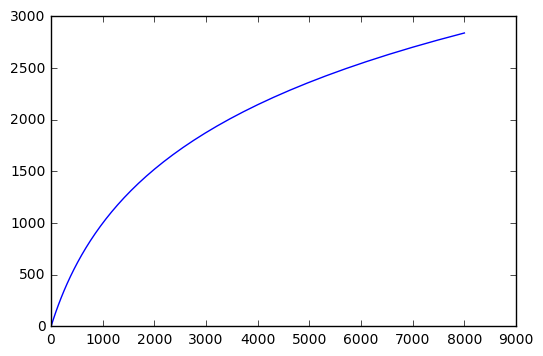

In [27]:
plt.plot(hz_points,mel_points)
plt.show()

In [28]:
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

In [29]:
bin

array([   0.,    1.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,
         16.,   19.,   21.,   24.,   27.,   30.,   33.,   37.,   41.,
         45.,   49.,   54.,   59.,   64.,   69.,   75.,   81.,   88.,
         95.,  103.,  110.,  119.,  128.,  137.,  148.,  158.,  170.,
        182.,  195.,  209.,  224.,  239.,  256.])

In [30]:
fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))

In [31]:
np.shape(fbank)

(40, 257)

In [32]:
for m in range(1, 2):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

In [33]:
fbank

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [34]:
for m in range(1, 3):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

In [35]:
fbank

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
for m in range(1, nfilt+1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

In [37]:
fbank

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.11764706,
         0.05882353,  0.        ]])

In [38]:
np.shape(fbank)

(40, 257)

In [39]:
40*257

10280

In [41]:
ts = 

2.57

In [42]:
hz_points

array([    0.        ,    44.37407701,    91.56109503,   141.73937073,
         195.09852453,   251.84019719,   312.17881177,   376.34238398,
         444.57338374,   517.12965156,   594.28537283,   676.33211398,
         763.57992429,   856.35850754,   955.01846792,  1059.93263499,
        1171.49747253,  1290.13457677,  1416.29226959,  1550.44729265,
        1693.10660904,  1844.80931898,  2006.12869712,  2177.67435884,
        2360.094564  ,  2554.07866662,  2760.35971998,  2979.71724669,
        3212.98018452,  3461.03001887,  3724.80411386,  4005.29925458,
        4303.57541383,  4620.75975774,  4958.05090523,  5316.72345751,
        5698.13281472,  6103.72029792,  6535.01859571,  6993.65755619,
        7481.37034603,  8000.        ])

In [43]:
np.shape(hz_points)

(42,)

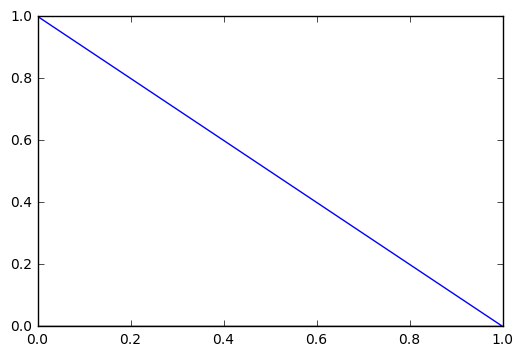

In [47]:
plt.plot(fbank[34,:],fbank[35,:])
plt.show()

In [58]:
bin1 = np.arange(257)
plt.plot(bin1,fbank,bin1,fbank[35,:])
plt.show()

ValueError: x and y must have same first dimension

In [60]:
def mfccfilter(fs, nfft):
    """
    Computes the triangular filterbank for MFCC computation (used in the stFeatureExtraction function before the stMFCC function call)
    This function is taken from the scikits.talkbox library (MIT Licence):
    https://pypi.python.org/pypi/scikits.talkbox
    """

    # filter bank params:
    lowfreq = 133.33
    linsc = 200/3.
    logsc = 1.0711703
    numLinFiltTotal = 13
    numLogFilt = 27

    if fs < 8000:
        nlogfil = 5

    # Total number of filters
    nFiltTotal = numLinFiltTotal + numLogFilt

    # Compute frequency points of the triangle:
    freqs = numpy.zeros(nFiltTotal+2)
    freqs[:numLinFiltTotal] = lowfreq + numpy.arange(numLinFiltTotal) * linsc
    freqs[numLinFiltTotal:] = freqs[numLinFiltTotal-1] * logsc ** numpy.arange(1, numLogFilt + 3)
    heights = 2./(freqs[2:] - freqs[0:-2])

    # Compute filterbank coeff (in fft domain, in bins)
    fbank = numpy.zeros((nFiltTotal, nfft))
    nfreqs = numpy.arange(nfft) / (1. * nfft) * fs

    for i in range(nFiltTotal):
        lowTrFreq = freqs[i]
        cenTrFreq = freqs[i+1]
        highTrFreq = freqs[i+2]

        lid = numpy.arange(numpy.floor(lowTrFreq * nfft / fs) + 1, numpy.floor(cenTrFreq * nfft / fs) + 1, dtype=numpy.int)
        lslope = heights[i] / (cenTrFreq - lowTrFreq)
        rid = numpy.arange(numpy.floor(cenTrFreq * nfft / fs) + 1, numpy.floor(highTrFreq * nfft / fs) + 1, dtype=numpy.int)
        rslope = heights[i] / (highTrFreq - cenTrFreq)
        fbank[i][lid] = lslope * (nfreqs[lid] - lowTrFreq)
        fbank[i][rid] = rslope * (highTrFreq - nfreqs[rid])

    return fbank, freqs

In [62]:
sample_rate

16000

In [63]:
import pyAudioAnalysis

In [64]:
dir(pyAudioAnalysis)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [66]:
from pyAudioAnalysis import audioTrainTest as aT
aT.featureAndTrain(["classifierData/music","classifierData/speech"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmSMtemp", False)
aT.fileClassification("data/doremi.wav", "svmSMtemp","svm")
Result:(0.0, array([ 0.90156761,  0.09843239]), ['music', 'speech'])


SyntaxError: invalid syntax (<ipython-input-66-e0d6ccb1ab13>, line 4)

In [67]:
help(pyAudioAnalysis)

Help on package pyAudioAnalysis:

NAME
    pyAudioAnalysis

PACKAGE CONTENTS
    analyzeMovieSound
    audioAnalysis
    audioAnalysisRecordAlsa
    audioBasicIO
    audioFeatureExtraction
    audioSegmentation
    audioTrainTest
    audioVisualization
    convertToWav
    utilities

FILE
    /home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/__init__.py




In [69]:
from pyAudioAnalysis import audioFeatureExtraction as feaex

SyntaxError: invalid syntax (audioFeatureExtraction.py, line 756)

In [76]:
from pyAudioAnalysis import audioBasicIO

In [78]:
from pyAudioAnalysis import audioFeatureExtraction

ImportError: No module named 'utilities'

In [81]:
from pyAudioAnalysis import peakdet

In [83]:
from pyAudioAnalysis import audioFeatureExtraction as fea

In [85]:
[fbank , fre] = fea.mfccInitFilterBanks(16000,512)

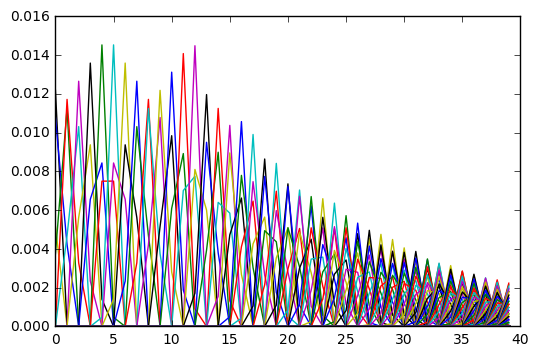

In [86]:
plt.plot(fbank)
plt.show()

In [91]:
fea.stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/audioFeatureExtraction.py:205: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  nfreqs = numpy.arange(nfft) / (1. * nfft) * fs


TypeError: 'float' object cannot be interpreted as an integer

In [92]:
fea.stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/audioFeatureExtraction.py:205: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros((nFiltTotal, nfft))


TypeError: 'float' object cannot be interpreted as an integer

In [93]:
fea.stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/audioFeatureExtraction.py:205: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros((nFiltTotal, nfft))


TypeError: 'float' object cannot be interpreted as an integer

In [94]:
fea.stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/audioFeatureExtraction.py:205: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


TypeError: 'float' object cannot be interpreted as an integer

In [95]:
fea.stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/pyAudioAnalysis/audioFeatureExtraction.py:205: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


TypeError: 'float' object cannot be interpreted as an integer

In [96]:
import sys
import time
import os
import glob
import numpy
#import cPickle
#import aifc
import math
from numpy import NaN, Inf, arange, isscalar, array
from scipy.fftpack import rfft
from scipy.fftpack import fft
from scipy.fftpack.realtransforms import dct
from scipy.signal import fftconvolve
from matplotlib.mlab import find
import matplotlib.pyplot as plt
from scipy import linalg as la
#import audioTrainTest as aT
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import peakdet
#import utilities
from scipy.signal import lfilter, hamming
#from scikits.talkbox import lpc

eps = 0.00000001


In [97]:
def mfccInitFilterBanks(fs, nfft):
    """
    Computes the triangular filterbank for MFCC computation (used in the stFeatureExtraction function before the stMFCC function call)
    This function is taken from the scikits.talkbox library (MIT Licence):
    https://pypi.python.org/pypi/scikits.talkbox
    """
    
    nfft = int(nfft);

    # filter bank params:
    lowfreq = 133.33
    linsc = 200/3.
    logsc = 1.0711703
    numLinFiltTotal = 13
    numLogFilt = 27

    if fs < 8000:
        nlogfil = 5

    # Total number of filters
    nFiltTotal = numLinFiltTotal + numLogFilt

    # Compute frequency points of the triangle:
    freqs = numpy.zeros(nFiltTotal+2)
    freqs[:numLinFiltTotal] = lowfreq + numpy.arange(numLinFiltTotal) * linsc
    freqs[numLinFiltTotal:] = freqs[numLinFiltTotal-1] * logsc ** numpy.arange(1, numLogFilt + 3)
    heights = 2./(freqs[2:] - freqs[0:-2])

    # Compute filterbank coeff (in fft domain, in bins)
    fbank = numpy.zeros((int(nFiltTotal), int(nfft)))
    nfreqs = numpy.arange(nfft) / (1. * nfft) * fs

    for i in range(nFiltTotal):
        lowTrFreq = freqs[i]
        cenTrFreq = freqs[i+1]
        highTrFreq = freqs[i+2]

        lid = numpy.arange(numpy.floor(lowTrFreq * nfft / fs) + 1, numpy.floor(cenTrFreq * nfft / fs) + 1, dtype=numpy.int)
        lslope = heights[i] / (cenTrFreq - lowTrFreq)
        rid = numpy.arange(numpy.floor(cenTrFreq * nfft / fs) + 1, numpy.floor(highTrFreq * nfft / fs) + 1, dtype=numpy.int)
        rslope = heights[i] / (highTrFreq - cenTrFreq)
        fbank[i][lid] = lslope * (nfreqs[lid] - lowTrFreq)
        fbank[i][rid] = rslope * (highTrFreq - nfreqs[rid])

    return fbank, freqs


def stMFCC(X, fbank, nceps):
    """
    Computes the MFCCs of a frame, given the fft mag

    ARGUMENTS:
        X:        fft magnitude abs(FFT)
        fbank:    filter bank (see mfccInitFilterBanks)
    RETURN
        ceps:     MFCCs (13 element vector)

    Note:    MFCC calculation is, in general, taken from the scikits.talkbox library (MIT Licence),
    #    with a small number of modifications to make it more compact and suitable for the pyAudioAnalysis Lib
    """

    mspec = numpy.log10(numpy.dot(X, fbank.T)+eps)
    ceps = dct(mspec, type=2, norm='ortho', axis=-1)[:nceps]
    return ceps

In [103]:
def stFeatureExtraction(signal, Fs, Win, Step):
    """
    This function implements the shor-term windowing process. For each short-term window a set of features is extracted.
    This results to a sequence of feature vectors, stored in a numpy matrix.

    ARGUMENTS
        signal:       the input signal samples
        Fs:           the sampling freq (in Hz)
        Win:          the short-term window size (in samples)
        Step:         the short-term window step (in samples)
    RETURNS
        stFeatures:   a numpy array (numOfFeatures x numOfShortTermWindows)
    """

    Win = int(Win)
    Step = int(Step)

    # Signal normalization
    signal = numpy.double(signal)

    signal = signal / (2.0 ** 15)
    DC = signal.mean()
    MAX = (numpy.abs(signal)).max()
    signal = (signal - DC) / MAX

    N = len(signal)                                # total number of samples
    curPos = 0
    countFrames = 0
    nFFT = Win / 2

    [fbank, freqs] = mfccInitFilterBanks(Fs, nFFT)                # compute the triangular filter banks used in the mfcc calculation
    #nChroma, nFreqsPerChroma = stChromaFeaturesInit(nFFT, Fs)

    numOfTimeSpectralFeatures = 8
    numOfHarmonicFeatures = 0
    nceps = 13
    numOfChromaFeatures = 13
    totalNumOfFeatures = numOfTimeSpectralFeatures + nceps + numOfHarmonicFeatures + numOfChromaFeatures
#    totalNumOfFeatures = numOfTimeSpectralFeatures + nceps + numOfHarmonicFeatures
    stFeatures = numpy.array([], dtype=numpy.float64)

    while (curPos + Win - 1 < N):                        # for each short-term window until the end of signal
        countFrames += 1
        x = signal[curPos:curPos+Win]                    # get current window
        curPos = curPos + Step                           # update window position
        X = abs(fft(x))                                  # get fft magnitude
        X = X[0:nFFT]                                    # normalize fft
        X = X / len(X)
        if countFrames == 1:
            Xprev = X.copy()                             # keep previous fft mag (used in spectral flux)
        curFV = numpy.zeros((15, 1))
        curFV[0] = stZCR(x)                              # zero crossing rate
        curFV[1] = stEnergy(x)                           # short-term energy
        curFV[2:2+nceps, 0] = stMFCC(X, fbank, nceps).copy()    # MFCCs

#        curFV[numOfTimeSpectralFeatures+nceps+numOfChromaFeatures-1] = numpy.nonzero( chromaF > 2.0 * chromaF.mean() )[0].shape[0]
#        temp = numpy.sort(chromaF[:,0])
#        curFV[numOfTimeSpectralFeatures+numOfChromaFeatures] = temp[-1] / numpy.mean(temp[0:5])
#        temp = numpy.sort(chromaF[:,0])
#        if countFrames==10 or countFrames==30:
#            A = int(temp[-1] / numpy.mean(temp[0:5]))/10
#            for a in range(A):
#                print("|"),
#            print
#        if countFrames==20:
#            print numpy.nonzero(chromaF > 5*chromaF.mean())[0].shape[0]
        #HR, curFV[numOfTimeSpectralFeatures+nceps] = stHarmonic(x, Fs)
        # curFV[numOfTimeSpectralFeatures+nceps+1] = freq_from_autocorr(x, Fs)
        if countFrames == 1:
            stFeatures = curFV                                        # initialize feature matrix (if first frame)
        else:
            stFeatures = numpy.concatenate((stFeatures, curFV), 1)    # update feature matrix
        Xprev = X.copy()

    return numpy.array(stFeatures)

In [100]:
def stZCR(frame):
    """Computes zero crossing rate of frame"""
    count = len(frame)
    countZ = numpy.sum(numpy.abs(numpy.diff(numpy.sign(frame)))) / 2
    return (numpy.float64(countZ) / numpy.float64(count-1.0))


def stEnergy(frame):
    """Computes signal energy of frame"""
    return numpy.sum(frame ** 2) / numpy.float64(len(frame))


In [105]:
feaex = stFeatureExtraction(signal, sample_rate, frame_length ,frame_step)

/home/bhumihar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [106]:
np.shape(feaex)

(15, 318)

In [107]:
feaex

array([[  7.56892231e-01,   7.69423559e-01,   7.36842105e-01, ...,
          1.17794486e-01,   1.10275689e-01,   1.05263158e-01],
       [  1.87597780e-02,   1.76760771e-02,   1.58123390e-02, ...,
          1.57283105e-04,   1.42944999e-04,   1.36527152e-04],
       [ -2.86717105e+01,  -2.95023037e+01,  -2.82477482e+01, ...,
         -3.03365324e+01,  -3.03217478e+01,  -3.01785273e+01],
       ..., 
       [  2.64861409e-01,   9.66477955e-02,  -4.04131964e-01, ...,
         -8.51391230e-02,  -1.26525995e-01,  -3.51293479e-01],
       [  3.35654653e-01,   2.78625408e-01,   1.24976803e-01, ...,
         -2.46203397e-01,  -7.35367198e-02,  -2.86979007e-01],
       [  1.39416838e-01,  -7.32000316e-02,   1.61923740e-01, ...,
          2.91950946e-02,   1.72763229e-01,   1.30505339e-02]])

In [108]:
plt.plot(feaex[0,:])

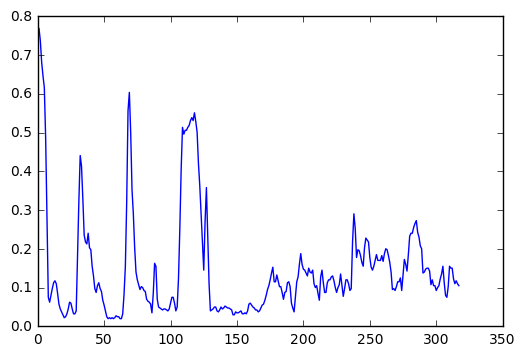

In [109]:
plt.show()

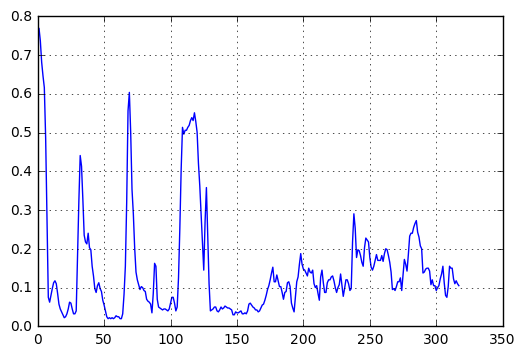

In [113]:
plt.plot(feaex[0,:])
plt.grid(True)
plt.show()